Red Wine Quality Prediction Project
Project Description
The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.
Attribute Information
Input variables (based on physicochemical tests):
1 - fixed acidity
2 - volatile acidity
3 - citric acid
4 - residual sugar
5 - chlorides
6 - free sulfur dioxide
7 - total sulfur dioxide
8 - density
9 - pH
10 - sulphates
11 - alcohol
Output variable (based on sensory data):
12 - quality (score between 0 and 10)
What might be an interesting thing to do, is to set an arbitrary cutoff for your dependent variable (wine quality) at e.g. 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'.
This allows you to practice with hyper parameter tuning on e.g. decision tree algorithms looking at the ROC curve and the AUC value.
You need to build a classification model. 
Inspiration
Use machine learning to determine which physiochemical properties make a wine 'good'!


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report,roc_curve
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
R_wine=pd.read_csv(r"C:\Users\HP\Desktop\DSData-master\winequality-red.csv")

In [3]:
R_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


The given dataset contains only numerical with 11 features columns and one target variable. based on quality the wine is predicted so i am considering wine is my target variable.

In [4]:
R_wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [5]:
R_wine.tail(15)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1584,6.7,0.320,0.44,2.4,0.061,24.0,34.0,0.99484,3.29,0.80,11.6,7
1585,7.2,0.390,0.44,2.6,0.066,22.0,48.0,0.99494,3.30,0.84,11.5,6
1586,7.5,0.310,0.41,2.4,0.065,34.0,60.0,0.99492,3.34,0.85,11.4,6
1587,5.8,0.610,0.11,1.8,0.066,18.0,28.0,0.99483,3.55,0.66,10.9,6
1588,7.2,0.660,0.33,2.5,0.068,34.0,102.0,0.99414,3.27,0.78,12.8,6
1589,6.6,0.725,0.20,7.8,0.073,29.0,79.0,0.99770,3.29,0.54,9.2,5
1590,6.3,0.550,0.15,1.8,0.077,26.0,35.0,0.99314,3.32,0.82,11.6,6
1591,5.4,0.740,0.09,1.7,0.089,16.0,26.0,0.99402,3.67,0.56,11.6,6
1592,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6


Exploratory Data Analysis(EDA)

In [6]:
#finding the shape of the dataset
R_wine.shape

(1599, 12)

In [7]:
#list of the columns present in the dataset
R_wine.columns.tolist()

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [8]:
#check datatypes
R_wine.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

here only numerical data is presented in these columns.

In [9]:
#checking whether the null values present or not

R_wine.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

There is no null values present in the given dataset.

In [10]:
#checking the information of the dataset

R_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


here 11 columns are float type and quality column is  of int type and there is no null values present.

<AxesSubplot:>

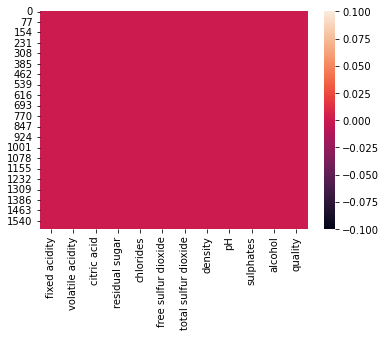

In [11]:
#visualizing using heatmap
sns.heatmap(R_wine.isnull())

In [12]:
R_wine['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [13]:
#checking the count of quality

R_wine['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

These are the value counts of quality 

Description of dataset

In [14]:
R_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


By the describe method the following assumptions are made:

1. The count value in each column is same that means there is no null values in the data.
2. The mean is greater than 50% of median in all columns which means there is skewness in the data.
3. There is huge difference between 75% and max values in residual sugar, free sulfurdioxide, total sulfurdioxide columns.
4. we can also get standard deviation, min,25% values  in these method.

Data Visualization

<AxesSubplot:xlabel='quality', ylabel='count'>

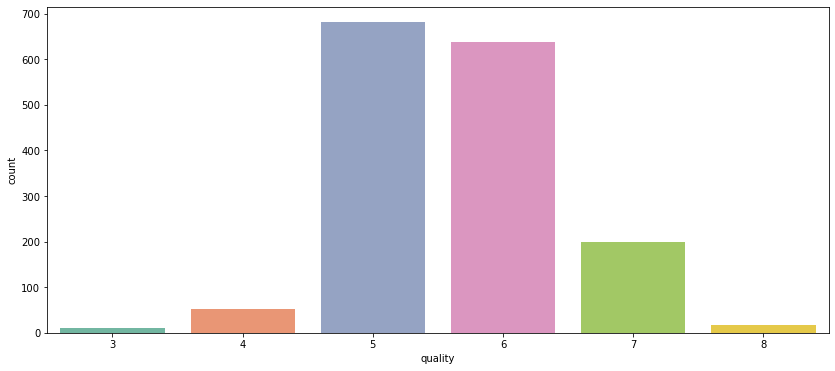

In [15]:
plt.figure(figsize=(14,6))
sns.countplot(R_wine['quality'], palette = 'Set2')

<AxesSubplot:xlabel='citric acid', ylabel='pH'>

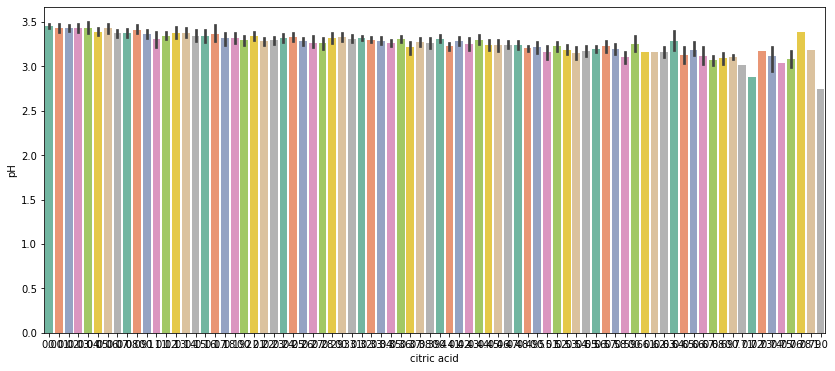

In [16]:
plt.figure(figsize=(14,6))
sns.barplot(x = 'citric acid', y = 'pH', data =R_wine, palette = 'Set2')

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

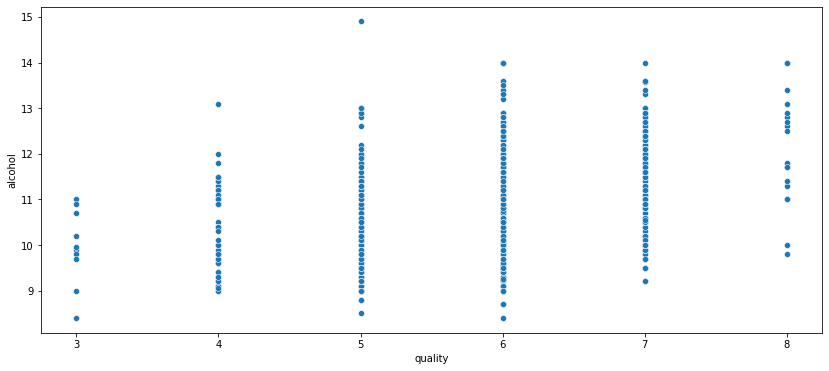

In [17]:
plt.figure(figsize=(14,6))
sns.scatterplot(x = 'quality', y = 'alcohol', data =R_wine, palette = 'Set2')

<AxesSubplot:xlabel='citric acid', ylabel='pH'>

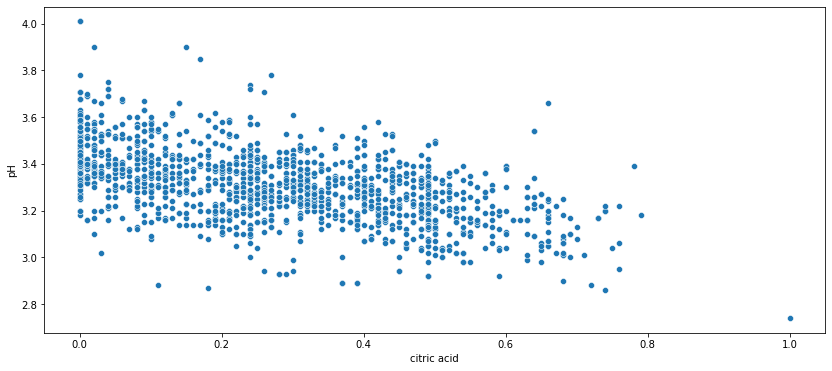

In [18]:
plt.figure(figsize=(14,6))
sns.scatterplot(x = 'citric acid', y = 'pH', data =R_wine, palette = 'Set2')

<AxesSubplot:xlabel='pH', ylabel='quality'>

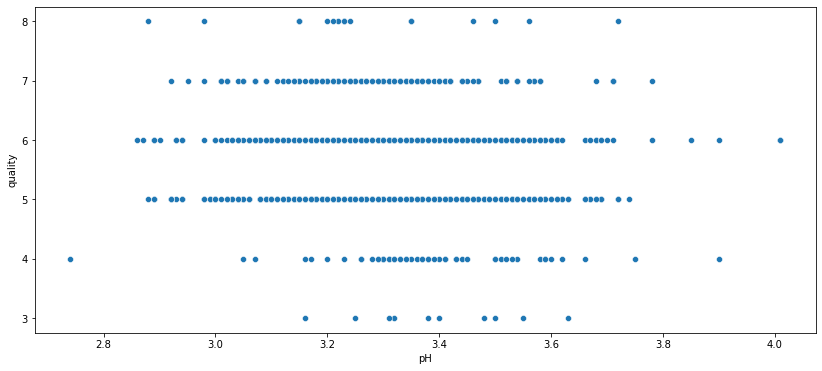

In [19]:
plt.figure(figsize=(14,6))
sns.scatterplot(x = 'pH', y = 'quality', data =R_wine, palette = 'Set2')

<AxesSubplot:xlabel='citric acid', ylabel='quality'>

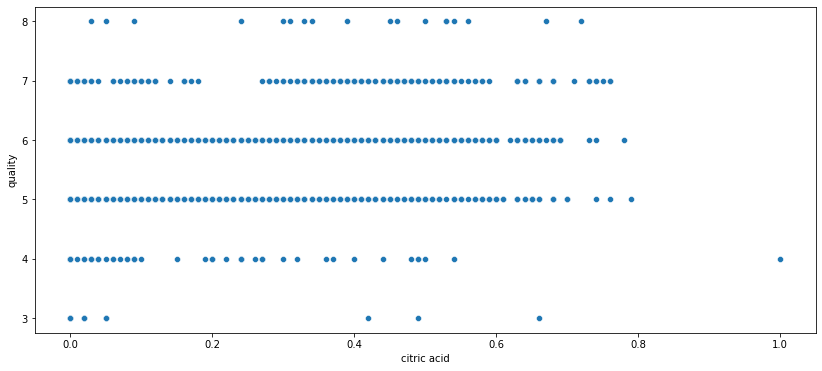

In [20]:
plt.figure(figsize=(14,6))
sns.scatterplot(x = 'citric acid', y = 'quality', data =R_wine, palette = 'Set2')

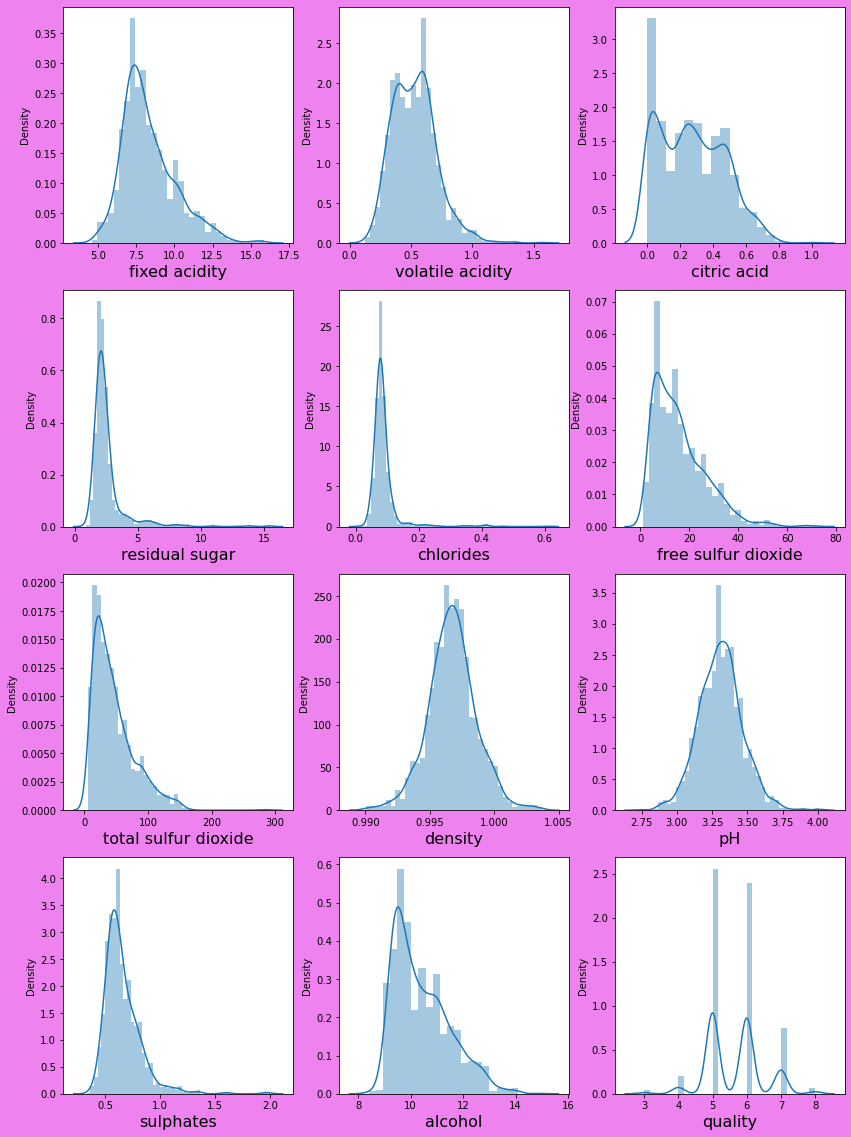

In [21]:
plt.figure(figsize=(14,20),facecolor="violet")
plotnumber=1
for columns in R_wine:
    if plotnumber<=12:
    
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(R_wine[columns])
        plt.xlabel(columns, fontsize=16)
    plotnumber+=1
plt.show()

The above plots show that some of the columns have normal distribution. most of the column shows skewness they are critic acid, residual sugar, chlorides, free sulphur dioxide, total sulphur dioxide, sulphates, and alcohol columns.

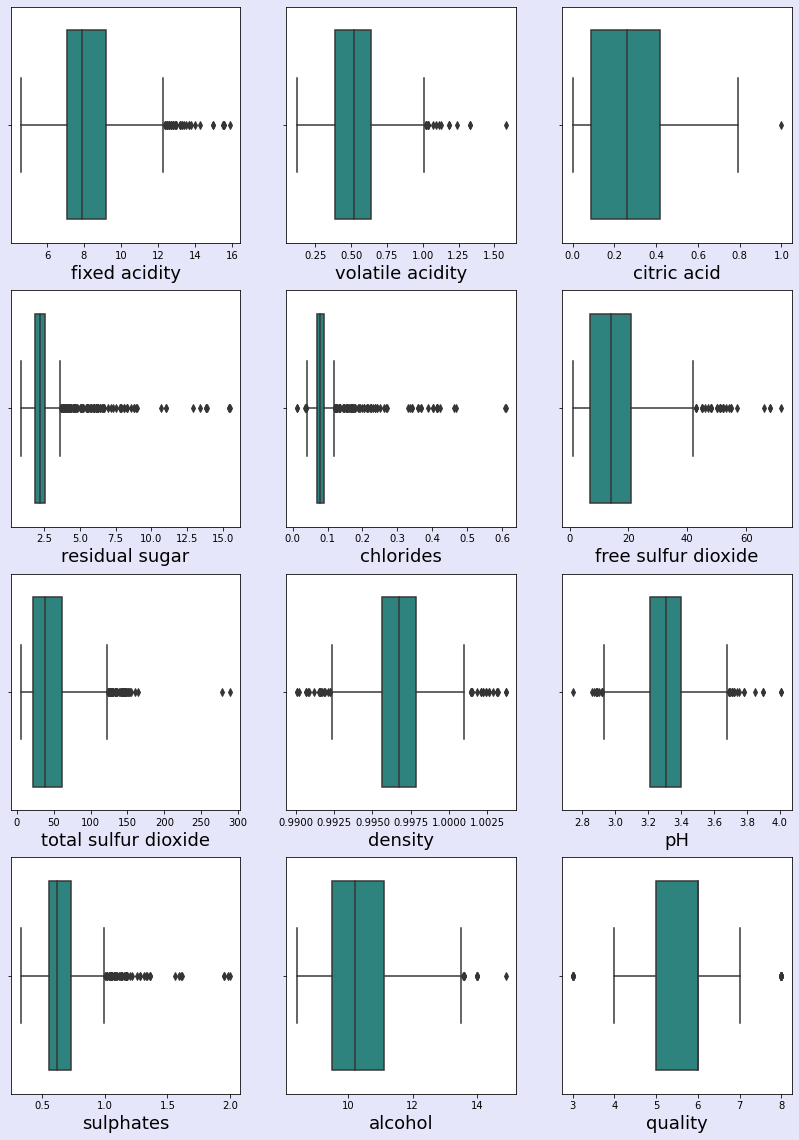

In [22]:
plt.figure(figsize=(14,20), facecolor="lavender")
plotnumber=1
for column in R_wine:
    if plotnumber<=12:
    
        ax=plt.subplot(4,3,plotnumber)
        sns.boxplot(R_wine[column], palette="viridis")
        plt.xlabel(column, fontsize=18)
        plt.yticks(rotation=0, fontsize=16)
    plotnumber+=1
plt.show()

In [23]:
from scipy import stats
from scipy.stats import zscore
data=R_wine.drop('quality', axis=1)
z=np.abs(zscore(data))

threshold=3
np.where(z>3)
data=data[(z<3).all(axis=1)]

In [24]:
z

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.528360,0.961877,1.391472,0.453218,0.243707,0.466193,0.379133,0.558274,1.288643,0.579207,0.960246
1,0.298547,1.967442,1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,0.719933,0.128950,0.584777
2,0.298547,1.297065,1.186070,0.169427,0.096353,0.083669,0.229047,0.134264,0.331177,0.048089,0.584777
3,1.654856,1.384443,1.484154,0.453218,0.264960,0.107592,0.411500,0.664277,0.979104,0.461180,0.584777
4,0.528360,0.961877,1.391472,0.453218,0.243707,0.466193,0.379133,0.558274,1.288643,0.579207,0.960246
...,...,...,...,...,...,...,...,...,...,...,...
1594,1.217796,0.403229,0.980669,0.382271,0.053845,1.542054,0.075043,0.978765,0.899886,0.461180,0.072294
1595,1.390155,0.123905,0.877968,0.240375,0.541259,2.211469,0.137820,0.862162,1.353436,0.601055,0.729364
1596,1.160343,0.099554,0.723916,0.169427,0.243707,1.255161,0.196679,0.533554,0.705508,0.542042,0.541630
1597,1.390155,0.654620,0.775267,0.382271,0.264960,1.542054,0.075043,0.676657,1.677400,0.305990,0.209308


In [25]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [26]:
loss_data=(1599-1458)/1599*100
loss_data

8.818011257035648

In [27]:
R_wine.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

In [28]:
R_wine['chlorides']=np.log(R_wine['chlorides'])

In [29]:
R_wine.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               1.745215
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

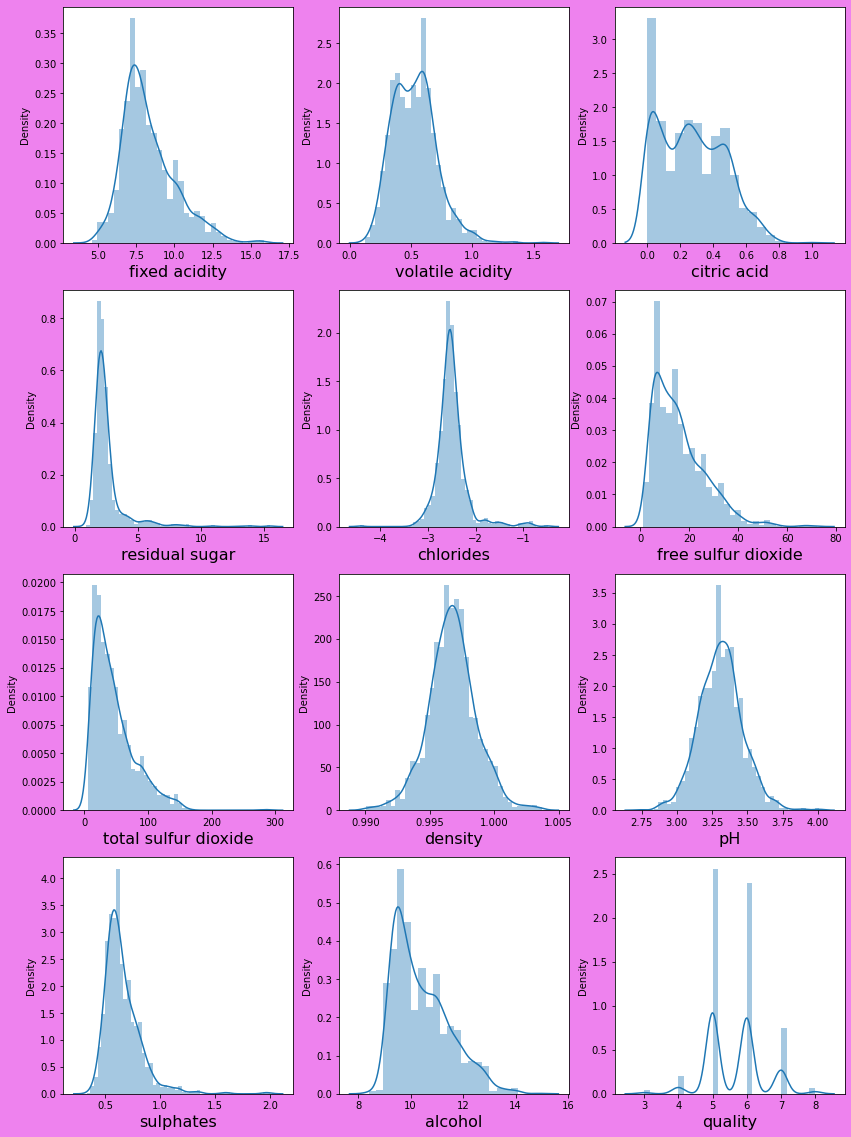

In [30]:
plt.figure(figsize=(14,20),facecolor="violet")
plotnumber=1
for columns in R_wine:
    if plotnumber<=12:
    
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(R_wine[columns])
        plt.xlabel(columns, fontsize=16)
    plotnumber+=1
plt.show()

In [31]:
#corelation b/n features and target variable.
corr=R_wine.corr()
corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.175191,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.108726,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.181780,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.102285,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.175191,0.108726,0.181780,0.102285,1.000000,-0.002195,0.058376,0.351939,-0.283629,0.278909,-0.303961,-0.176140
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,-0.002195,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.058376,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.351939,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.283629,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.278909,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


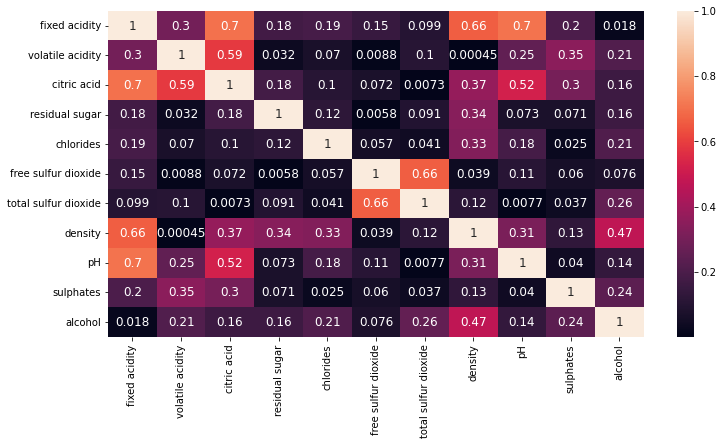

In [32]:
df_corr=data.corr().abs()
plt.figure(figsize=(12,6))
sns.heatmap(df_corr, annot=True, linecolor='blue', annot_kws={'size':12},)
plt.show()

In [33]:
corr['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
density                -0.174919
chlorides              -0.176140
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

In [34]:
#fixing features and label

a=R_wine.drop('quality', axis=1)
b=R_wine['quality']

In [36]:
scaler=StandardScaler()

x_scaled=scaler.fit_transform(a)
x_scaled
a=pd.DataFrame(scaler.fit_transform(a),columns=a.columns)
a

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.528360,0.961877,-1.391472,-0.453218,-0.218763,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.043416,0.558443,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,-0.298547,1.297065,-1.186070,-0.169427,0.365302,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777
3,1.654856,-1.384443,1.484154,-0.453218,-0.259254,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777
4,-0.528360,0.961877,-1.391472,-0.453218,-0.218763,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.217796,0.403229,-0.980669,-0.382271,0.298111,1.542054,-0.075043,-0.978765,0.899886,-0.461180,0.072294
1595,-1.390155,0.123905,-0.877968,-0.240375,-0.841175,2.211469,0.137820,-0.862162,1.353436,0.601055,0.729364
1596,-1.160343,-0.099554,-0.723916,-0.169427,-0.218763,1.255161,-0.196679,-0.533554,0.705508,0.542042,0.541630
1597,-1.390155,0.654620,-0.775267,-0.382271,-0.259254,1.542054,-0.075043,-0.676657,1.677400,0.305990,-0.209308


In [37]:
x_scaled

array([[-0.52835961,  0.96187667, -1.39147228, ...,  1.28864292,
        -0.57920652, -0.96024611],
       [-0.29854743,  1.96744245, -1.39147228, ..., -0.7199333 ,
         0.1289504 , -0.58477711],
       [-0.29854743,  1.29706527, -1.18607043, ..., -0.33117661,
        -0.04808883, -0.58477711],
       ...,
       [-1.1603431 , -0.09955388, -0.72391627, ...,  0.70550789,
         0.54204194,  0.54162988],
       [-1.39015528,  0.65462046, -0.77526673, ...,  1.6773996 ,
         0.30598963, -0.20930812],
       [-1.33270223, -1.21684919,  1.02199944, ...,  0.51112954,
         0.01092425,  0.54162988]])

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
vif['VIF values']=[variance_inflation_factor(a.values,i) for i in range(len(a.columns))] 

vif['features']=a.columns
vif

,VIF values,features
0,7.767420,fixed acidity
1,1.761920,volatile acidity
2,3.020253,citric acid
3,1.705235,residual sugar
4,1.459454,chlorides
5,1.960692,free sulfur dioxide
6,2.172050,total sulfur dioxide
7,6.569271,density
8,3.353357,pH
9,1.331199,sulphates


In [39]:
a=a.drop('fixed acidity', axis=1)

In [40]:
vif=pd.DataFrame()
vif['VIF values']=[variance_inflation_factor(a.values,i) for i in range(len(a.columns))] 

vif['features']=a.columns
vif

,VIF values,features
0,1.758684,volatile acidity
1,2.708966,citric acid
2,1.378647,residual sugar
3,1.379994,chlorides
4,1.937999,free sulfur dioxide
5,2.060843,total sulfur dioxide
6,2.379315,density
7,1.617760,pH
8,1.285108,sulphates
9,2.079921,alcohol


there is no multicolinearity presented.

In [41]:
b.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [42]:
!pip install imblearn

In [43]:
#balancing the label values.
from imblearn.over_sampling import SMOTE
sampling= SMOTE()

a,b=sampling.fit_resample(a,b)

In [44]:
b.value_counts()

5    681
6    681
7    681
4    681
8    681
3    681
Name: quality, dtype: int64

In [45]:
b

0       5
1       5
2       5
3       6
4       5
       ..
4081    8
4082    8
4083    8
4084    8
4085    8
Name: quality, Length: 4086, dtype: int64

In [46]:
b=b.apply(lambda y_value:1 if y_value>=7 else 0)
b

0       0
1       0
2       0
3       0
4       0
       ..
4081    1
4082    1
4083    1
4084    1
4085    1
Name: quality, Length: 4086, dtype: int64

In [47]:
a

,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.961877,-1.391472,-0.453218,-0.218763,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,1.967442,-1.391472,0.043416,0.558443,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,1.297065,-1.186070,-0.169427,0.365302,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777
3,-1.384443,1.484154,-0.453218,-0.259254,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777
4,0.961877,-1.391472,-0.453218,-0.218763,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
...,...,...,...,...,...,...,...,...,...,...
4081,-0.941169,0.226083,-0.487142,-0.311371,0.032735,-0.699091,-1.251010,-0.498801,0.227729,0.892607
4082,-1.262821,1.629655,0.109925,-0.118997,-0.944346,-0.831462,0.032138,-1.353705,1.440756,0.882858
4083,0.467818,2.026541,1.830408,0.139463,-0.947335,-0.838118,1.061785,-0.604522,0.180586,2.724037
4084,-0.797623,0.341938,-0.524166,-0.408181,-0.331471,-0.835529,-1.140492,-0.163284,0.222345,1.034635


Modelling

In [48]:
scaler=StandardScaler()

x_scaled=scaler.fit_transform(a)
x_scaled

array([[ 0.4968464 , -1.30168339, -0.54296284, ...,  1.2012006 ,
        -0.61457973, -1.12022895],
       [ 1.23086147, -1.30168339,  0.02288919, ..., -0.82003154,
         0.15105423, -0.77414588],
       [ 0.74151809, -1.10747885, -0.21961883, ..., -0.42882532,
        -0.04035426, -0.77414588],
       ...,
       [ 0.13620732,  1.92999955,  2.05893997, ..., -0.70389351,
         0.20688096,  2.27570516],
       [-0.78750437,  0.33723104, -0.62379885, ..., -0.25987452,
         0.25202958,  0.71852366],
       [-0.44445811,  0.27263261, -0.28061863, ..., -0.71740094,
         0.35605068,  1.50223527]])

In [49]:
#getting best random state

Accu_max=0
Rs_max=0
for k in range(1,400):
    x_train,x_test,y_train,y_test=train_test_split(a,b, test_size=0.30, random_state=k)
    
    RFC=RandomForestClassifier()
    RFC.fit(x_train,y_train)
    pred=RFC.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>Accu_max:
        Accu_max= acc
        Rs_max=k
print('The best accuracy is', Accu_max, 'at random state is', Rs_max)

The best accuracy is 0.9722675367047309 at random state is 56


In [50]:
#forming train_test_split
x_train,x_test,y_train,y_test=train_test_split(a,b, test_size=0.30, random_state=56)

In [51]:
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier,BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

In [52]:
def metric_score(clf, x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=clf.predict(x_train)
        
        print("\n================ Train Result ================== ")
        print(f"Accuracy Score: {accuracy_score(y_train,y_pred)*100:2f}%")
        
        
    elif train==False:
        
        pred=clf.predict(x_test)
        
        print("\n================ Test Result ================== ")
        print(f"Accuracy Score: {accuracy_score(y_test,pred)*100:2f}%")
        print('\n \n Test Classification Reprt \n', classification_report(y_test,pred, digits=2))
        

In [53]:
dc=DecisionTreeClassifier()
dc.fit(x_train,y_train)
metric_score(dc,x_train,x_test,y_train,y_test, train=True)
metric_score(dc,x_train,x_test,y_train,y_test, train=False)
y_pred=dc.predict(x_test)
probs_dc=dc.predict_proba(x_scaled)[:,1]
confusion_matrix(y_test,y_pred)


================ Train Result ================== 
Accuracy Score: 100.000000%

================ Test Result ================== 
Accuracy Score: 94.290375%

 
 Test Classification Reprt 
               precision    recall  f1-score   support

           0       0.96      0.95      0.96       820
           1       0.91      0.92      0.91       406

    accuracy                           0.94      1226
   macro avg       0.93      0.94      0.94      1226
weighted avg       0.94      0.94      0.94      1226



array([[782,  38],
       [ 32, 374]], dtype=int64)

In [54]:
kn=KNeighborsClassifier()
kn.fit(x_train,y_train)
metric_score(kn,x_train,x_test,y_train,y_test, train=True)
metric_score(kn,x_train,x_test,y_train,y_test, train=False)
y_pred=kn.predict(x_test)
probs_kn=kn.predict_proba(x_scaled)[:,1]
confusion_matrix(y_test,y_pred)


================ Train Result ================== 
Accuracy Score: 95.104895%

================ Test Result ================== 
Accuracy Score: 93.066884%

 
 Test Classification Reprt 
               precision    recall  f1-score   support

           0       0.99      0.91      0.95       820
           1       0.84      0.98      0.90       406

    accuracy                           0.93      1226
   macro avg       0.91      0.94      0.92      1226
weighted avg       0.94      0.93      0.93      1226



array([[743,  77],
       [  8, 398]], dtype=int64)

In [55]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
metric_score(rfc,x_train,x_test,y_train,y_test, train=True)
metric_score(rfc,x_train,x_test,y_train,y_test, train=False)
y_pred=rfc.predict(x_test)
probs_rfc=rfc.predict_proba(x_scaled)[:,1]
confusion_matrix(y_test,y_pred)


================ Train Result ================== 
Accuracy Score: 100.000000%

================ Test Result ================== 
Accuracy Score: 96.900489%

 
 Test Classification Reprt 
               precision    recall  f1-score   support

           0       0.98      0.97      0.98       820
           1       0.94      0.97      0.95       406

    accuracy                           0.97      1226
   macro avg       0.96      0.97      0.97      1226
weighted avg       0.97      0.97      0.97      1226



array([[795,  25],
       [ 13, 393]], dtype=int64)

In [56]:
GB=GradientBoostingClassifier()
GB.fit(x_train,y_train)
metric_score(GB,x_train,x_test,y_train,y_test, train=True)
metric_score(GB,x_train,x_test,y_train,y_test, train=False)
y_pred=GB.predict(x_test)
probs_GB=GB.predict_proba(x_scaled)[:,1]
confusion_matrix(y_test,y_pred)


================ Train Result ================== 
Accuracy Score: 95.244755%

================ Test Result ================== 
Accuracy Score: 94.535073%

 
 Test Classification Reprt 
               precision    recall  f1-score   support

           0       0.97      0.95      0.96       820
           1       0.91      0.93      0.92       406

    accuracy                           0.95      1226
   macro avg       0.94      0.94      0.94      1226
weighted avg       0.95      0.95      0.95      1226



array([[781,  39],
       [ 28, 378]], dtype=int64)

In [57]:
bag=BaggingClassifier()
bag.fit(x_train,y_train)
metric_score(bag,x_train,x_test,y_train,y_test, train=True)
metric_score(bag,x_train,x_test,y_train,y_test, train=False)
y_pred=bag.predict(x_test)
confusion_matrix(y_test,y_pred)


================ Train Result ================== 
Accuracy Score: 99.650350%

================ Test Result ================== 
Accuracy Score: 96.411093%

 
 Test Classification Reprt 
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       820
           1       0.94      0.95      0.95       406

    accuracy                           0.96      1226
   macro avg       0.96      0.96      0.96      1226
weighted avg       0.96      0.96      0.96      1226



array([[797,  23],
       [ 21, 385]], dtype=int64)

In [58]:
Etc=ExtraTreesClassifier()
Etc.fit(x_train,y_train)
metric_score(Etc,x_train,x_test,y_train,y_test, train=True)
metric_score(Etc,x_train,x_test,y_train,y_test, train=False)
y_pred=Etc.predict(x_test)
probs_Etc=Etc.predict_proba(x_scaled)[:,1]
confusion_matrix(y_test,y_pred)


================ Train Result ================== 
Accuracy Score: 100.000000%

================ Test Result ================== 
Accuracy Score: 96.492659%

 
 Test Classification Reprt 
               precision    recall  f1-score   support

           0       0.98      0.96      0.97       820
           1       0.93      0.97      0.95       406

    accuracy                           0.96      1226
   macro avg       0.96      0.97      0.96      1226
weighted avg       0.97      0.96      0.97      1226



array([[791,  29],
       [ 14, 392]], dtype=int64)

Crossvalidation

In [59]:
score=cross_val_score(dc, a,b)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is- ", accuracy_score(y_test, pred)-score.mean() )

[0.82762836 0.86168911 0.91187271 0.98898409 0.9620563 ]
0.9104461130081131
Difference between Accuracy score and cross validation score is-  -0.36069081121365953


In [60]:
score=cross_val_score(kn, a,b)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is- ", accuracy_score(y_test, pred)-score.mean() )

[0.85819071 0.81640147 0.92044064 0.99877601 0.97429621]
0.9136210059463779
Difference between Accuracy score and cross validation score is-  -0.3638657041519243


In [61]:
score=cross_val_score(GB, a,b)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is- ", accuracy_score(y_test, pred)-score.mean() )

[0.84352078 0.84822521 0.93023256 1.         0.99143207]
0.9226821246554723
Difference between Accuracy score and cross validation score is-  -0.37292682286101875


In [62]:
score=cross_val_score(Etc, a,b)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is- ", accuracy_score(y_test, pred)-score.mean() )

[0.90831296 0.8873929  0.9620563  1.         0.99877601]
0.9513076345266989
Difference between Accuracy score and cross validation score is-  -0.40155233273224533


In [63]:
score=cross_val_score(bag, a,b)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is- ", accuracy_score(y_test, pred)-score.mean() )

[0.85085575 0.88127295 0.94247246 0.99877601 0.99632803]
0.9339410389851356
Difference between Accuracy score and cross validation score is-  -0.38418573719068205


In [64]:
score=cross_val_score(rfc, a,b)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is- ", accuracy_score(y_test, pred)-score.mean() )

[0.89119804 0.88249694 0.94492044 1.         0.99632803]
0.9429886908092999
Difference between Accuracy score and cross validation score is-  -0.3932333890148464


comparing all methods the crossvalidation score is very less in clf . Now i am trying to increase my test result by using hyperparameter tuning.

Hyper parameter tuning

In [65]:
grid_param={
    'criterion':['gini','entropy'],
    'max_depth':range(110,152),
    'min_samples_leaf': range(1,4),
    'min_samples_split':range(1,5),
    'max_leaf_nodes' :range(120,190)
}

In [66]:
grid_search=GridSearchCV(estimator=dc,
                        param_grid=grid_param,
                        cv=5,
                         n_jobs=-1)

In [67]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(110, 152),
                         'max_leaf_nodes': range(120, 190),
                         'min_samples_leaf': range(1, 4),
                         'min_samples_split': range(1, 5)})

In [115]:
best_parameters=grid_search.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 135, 'max_leaf_nodes': 133, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [137]:
final_model=DecisionTreeClassifier( max_depth= 135, max_leaf_nodes= 133, min_samples_leaf= 1, min_samples_split=2)
final_model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=135, max_leaf_nodes=133)

In [138]:
dc.score(x_test,y_test)

0.9429037520391517

In [139]:
metric_score(dc,x_train,x_test,y_train,y_test,train=True)
metric_score(dc,x_train,x_test,y_train,y_test,train=False)


================ Train Result ================== 
Accuracy Score: 100.000000%

================ Test Result ================== 
Accuracy Score: 94.290375%

 
 Test Classification Reprt 
               precision    recall  f1-score   support

           0       0.96      0.95      0.96       820
           1       0.91      0.92      0.91       406

    accuracy                           0.94      1226
   macro avg       0.93      0.94      0.94      1226
weighted avg       0.94      0.94      0.94      1226



Finally, the test score for this model is 94.29.

AUC & ROC CURVE

In [140]:
from sklearn.metrics import roc_auc_score, auc
from sklearn.metrics import roc_curve

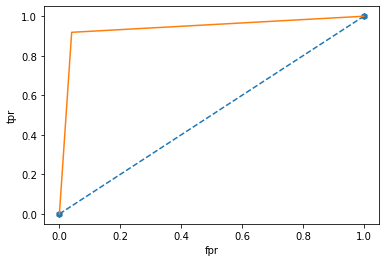

Auc Score is : 
 93.92376546918179


In [143]:
y_pred=final_model.predict(x_test)
fpr,tpr,thresholds=roc_curve(y_test,y_pred)
roc_auc=auc(fpr,tpr)

plt.plot([0,1],[0,1],'h--')
plt.plot(fpr,tpr, label="decision tree classifier"%roc_auc)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.show()
auc_score=roc_auc_score(y_test, final_model.predict(x_test))
print('Auc Score is :','\n', auc_score*100)

Saving the model

In [144]:
import pickle
filename='red wine prediction'
pickle.dump(dc, open(filename,'wb'))


In [145]:
import pickle
loaded_model=pickle.load(open('red wine prediction','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

94.29037520391516


In [146]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]],index=['original','predicted'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,1216,1217,1218,1219,1220,1221,1222,1223,1224,1225
original,1,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
predicted,1,0,1,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
